In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 


In [3]:
df = sns.load_dataset('iris') 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df = df[df['species']!='setosa']
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [9]:
df['species'] = df['species'].map({'versicolor':0 ,'virginica':1})
df.head()

C:\Users\Siam\AppData\Local\Temp\ipykernel_20340\1263093916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].map({'versicolor':0 ,'virginica':1})


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [11]:
X= df.drop(columns=['species']) 
y = df['species']

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [32]:
from sklearn.model_selection import train_test_split 
X_train ,X_test , y_train , y_test = train_test_split(X,y , test_size  = 0.25 , random_state  = 42 ) 


In [33]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression() 
classifier 

LogisticRegression()

In [36]:
X.shape , X_test.shape

((100, 4), (25, 4))

In [37]:
classifier.fit(X_train, y_train ) 

LogisticRegression()

In [39]:
y_pred = classifier.predict(X_test) 


C:\Users\Siam\AppData\Local\Temp\ipykernel_20340\3524681940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test)


<Axes: xlabel='species', ylabel='Density'>

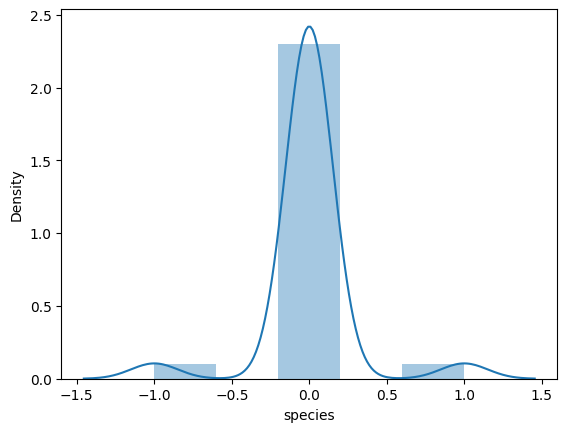

In [40]:
sns.distplot(y_pred-y_test)

In [43]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.92

In [49]:
from sklearn.model_selection import GridSearchCV 
parameter  = {'penalty':['11','12','elasticnet'] , 'C':[1,2,3,4,5,6,10,20,30,40,50] , 'max_iter': [100,200,300] } 


In [53]:
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error, greater_is_better=False) 

In [54]:
classifier_reg  = GridSearchCV(estimator = classifier,param_grid= parameter , scoring =scorer, error_score='raise' , cv = 5 )  
